In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/students-performance-dataset/Student_performance_data _.csv


In [2]:
data = pd.read_csv("/kaggle/input/students-performance-dataset/Student_performance_data _.csv")
data.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [3]:
y = data["GradeClass"]
data = data.drop(["GradeClass", "GPA", "StudentID"], axis=1)

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

#Standardizing the data
scaler = StandardScaler()
X = scaler.fit_transform(data)

#Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#Applying random forest regressor
rfc = RandomForestClassifier()
model = rfc.fit(X_train, y_train)
y_pred = model.predict(X_test)

rmse = (mean_squared_error(y_test, y_pred))**0.5
print(rmse)
for i in range(0, 10):
    print(y_test.iloc[i], y_pred[i])

0.7672851579236609
4.0 4.0
4.0 4.0
4.0 4.0
4.0 4.0
2.0 2.0
4.0 4.0
4.0 4.0
0.0 1.0
2.0 3.0
4.0 4.0


In [5]:
from sklearn.model_selection import cross_val_score
cvs = cross_val_score(rfc, X_train, y_train)
cvs

array([0.69712794, 0.67101828, 0.70234987, 0.68586387, 0.71989529])

In [6]:
#correlation
corrScores = []
for i in range(0,12):
    r = np.corrcoef(X[:, i], y)
    corrScores.append(r[0,1])
    
corrTable = pd.DataFrame({"Feature":data.columns, "Score":corrScores})

# Sorting the DataFrame by the absolute value of the Score column
corrTable = corrTable.reindex(corrTable['Score'].abs().sort_values(ascending=False).index)

print(corrTable)

              Feature     Score
5            Absences  0.728633
7     ParentalSupport -0.136823
4     StudyTimeWeekly -0.134131
6            Tutoring -0.111695
8     Extracurricular -0.069733
3   ParentalEducation  0.041031
10              Music -0.036065
9              Sports -0.026654
2           Ethnicity -0.023326
1              Gender  0.022998
11       Volunteering  0.013156
0                 Age -0.006250


[]

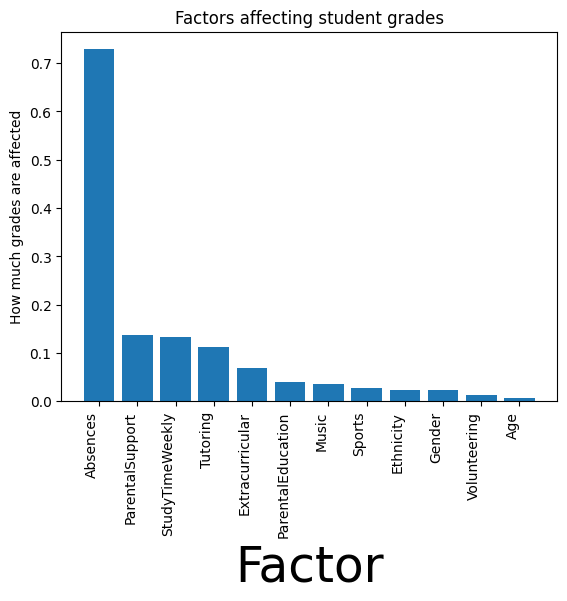

In [7]:
# Graph it!
import matplotlib.pyplot as plt
plt.bar(corrTable["Feature"], corrTable["Score"].abs())
plt.title(label="Factors affecting student grades")
plt.ylabel(ylabel="How much grades are affected")
plt.xlabel(xlabel="Factor", size=35)
plt.xticks(rotation=90, ha='right')
plt.plot()